In [100]:
import os 
import numpy as np
import pandas
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D


OUTPUT:



In [80]:
# function to compute differentially-private second-moment matrix
def dp_pca_ag ( A, N, epsilon = 1.0, delta = 0.1 ):
    sigma = ( 1.0 / ( N * epsilon ) ) * np.sqrt( 2.0 * np.log( 1.25 / delta ) )
    m = A.shape[0]
    temp = np.random.normal( 0, sigma, (m, m))
    temp2 = np.triu(temp)
    temp3 = temp2.transpose()
    temp4 = np.tril(temp3, -1)
    E = temp2 + temp4
    hat_A = A + E
    return hat_A

# function to compute the second-moment matrix of local data
def localPCA(data, epsilon = 0, delta = 0):
    N = data.shape[1] # Number of features 
    C = (1/N) * np.dot(data, data.T)
    if not(epsilon == 0):
        C = dp_pca_ag( C, N, epsilon, delta )
    return C

# function to compute the global second-moment matrix and PCA subspace
def globalPCA(Cs, K):
    C = 0
    S = len(Cs)
    for s in range(S):
        C += Cs[s]
    C = (1/S) * C
    U, S, V = np.linalg.svd(C)
    Uk = U[:, :K]
    return Uk



OUTPUT:



In [89]:
import random
n = 660000 #number of records in file
s = 10000 #desired sample size
skip = sorted(random.sample(xrange(1,n),n-s))
iHMPall_MSP_df = pandas.read_csv(
    "/data/iHMPall_MSP_df.tsv.gz",
    index_col=[0,1], skiprows=skip,
    sep = "\t")


OUTPUT:



In [82]:
iHMPall_metadata_df = pandas.read_csv(
    "/data/iHMPall_metadata_df.tsv.gz",
    index_col=0,
    sep = "\t")

iHMPall_norm_df = pandas.read_csv(
    "/data/iHMPall_norm_df.tsv.gz",
    index_col=0,
    sep = "\t")


OUTPUT:



In [83]:
print(iHMPall_metadata_df.dtypes)
print(iHMPall_metadata_df.head().to_string())


OUTPUT:
study|subset      object
diagnosis         object
participantID     object
visit_num        float64
hbi|sccai        float64
dtype: object
               study|subset diagnosis participantID  visit_num  hbi|sccai
CSM5FZ3N  HMP2|Cedars-Sinai        CD         C3001        1.0        4.0
CSM5MCWI  HMP2|Cedars-Sinai        CD         C3001       10.0        5.0
CSM5MCXD  HMP2|Cedars-Sinai        CD         C3001       11.0        5.0
CSM5MCYS  HMP2|Cedars-Sinai        CD         C3001       13.0        4.0
CSM67U9J  HMP2|Cedars-Sinai        CD         C3001       14.0        4.0



In [84]:
i_CD_baseline = iHMPall_metadata_df\
    .loc[iHMPall_metadata_df["diagnosis"] == "CD", ["study|subset","participantID", "diagnosis", "visit_num"]]

i_CD_baseline_CedarsSinai = i_CD_baseline.loc[i_CD_baseline["study|subset"] == "HMP2|Cedars-Sinai",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()
i_CD_baseline_Emory = i_CD_baseline.loc[i_CD_baseline["study|subset"] == "HMP2|Emory",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()
i_CD_baseline_Cincinnati = i_CD_baseline.loc[i_CD_baseline["study|subset"] == "HMP2|Cincinnati",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()
i_CD_baseline_MGH = i_CD_baseline.loc[i_CD_baseline["study|subset"] == "HMP2|MGH",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()
i_CD_baseline_MGH_Pediatrics = i_CD_baseline.loc[i_CD_baseline["study|subset"] == "HMP2|MGH Pediatrics",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_UC_baseline = iHMPall_metadata_df\
    .loc[iHMPall_metadata_df["diagnosis"] == "UC", ["study|subset","participantID", "diagnosis", "visit_num"]]

i_UC_baseline_CedarsSinai = i_UC_baseline.loc[i_UC_baseline["study|subset"] == "HMP2|Cedars-Sinai",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_UC_baseline_Emory = i_UC_baseline.loc[i_UC_baseline["study|subset"] == "Emory",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_UC_baseline_Cincinnati = i_UC_baseline.loc[i_UC_baseline["study|subset"] == "HMP2|Cincinnati",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_UC_baseline_MGH = i_UC_baseline.loc[i_UC_baseline["study|subset"] == "HMP2|MGH",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_UC_baseline_MGH_Pediatrics = i_UC_baseline.loc[i_UC_baseline["study|subset"] == "MGH Pediatrics",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_nonIBD_baseline = iHMPall_metadata_df\
    .loc[iHMPall_metadata_df["diagnosis"] == "nonIBD", ["study|subset","participantID", "diagnosis", "visit_num"]]

i_nonIBD_baseline_CedarsSinai = i_nonIBD_baseline.loc[i_nonIBD_baseline["study|subset"] == "HMP2|Cedars-Sinai",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_nonIBD_baseline_Emory = i_nonIBD_baseline.loc[i_nonIBD_baseline["study|subset"] == "HMP2|Emory",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_nonIBD_baseline_Cincinnati = i_nonIBD_baseline.loc[i_nonIBD_baseline["study|subset"] == "HMP2|Cincinnati",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_nonIBD_baseline_MGH = i_nonIBD_baseline.loc[i_nonIBD_baseline["study|subset"] == "HMP2|MGH",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()

i_nonIBD_baseline_MGH_Pediatrics = i_nonIBD_baseline.loc[i_nonIBD_baseline["study|subset"] == "HMP2|MGH Pediatrics",:]\
                            .reset_index()\
                            .dropna(axis="index", how="any")["index"].tolist()


OUTPUT:



In [85]:
print(iHMPall_MSP_df.shape)
print(iHMPall_MSP_df.size)
print("i_CD_baseline", i_CD_baseline.shape)
print("i_CD_baseline_CedarsSinai", len(i_CD_baseline_CedarsSinai))
print("i_CD_baseline_Emory", len(i_CD_baseline_Emory))
print("i_CD_baseline_Cincinnati", len(i_CD_baseline_Cincinnati))
print("i_CD_baseline_MGH", len(i_CD_baseline_MGH))
print("i_CD_baseline_MGH_Pediatrics", len(i_CD_baseline_MGH_Pediatrics))
print("i_UC_baseline", i_UC_baseline.shape)
print("i_UC_baseline_CedarsSinai", len(i_UC_baseline_CedarsSinai))
print("i_UC_baseline_Emory", len(i_UC_baseline_Emory))
print("i_UC_baseline_Cincinnati", len(i_UC_baseline_Cincinnati))
print("i_UC_baseline_MGH", len(i_UC_baseline_MGH))
print("i_UC_baseline_MGH_Pediatrics", len(i_UC_baseline_MGH_Pediatrics))
print("i_nonIBD_baseline", len(i_nonIBD_baseline))
print("i_nonIBD_baseline_CedarsSinai", len(i_nonIBD_baseline_CedarsSinai))
print("i_nonIBD_baseline_Emory", len(i_nonIBD_baseline_Emory))
print("i_nonIBD_baseline_Cincinnati", len(i_nonIBD_baseline_Cincinnati))
print("i_nonIBD_baseline_MGH", len(i_nonIBD_baseline_MGH))
print("i_nonIBD_baseline_MGH_Pediatrics", len(i_nonIBD_baseline_MGH_Pediatrics))


OUTPUT:
(11729, 1636)
19188644
('i_CD_baseline', (699, 4))
('i_CD_baseline_CedarsSinai', 204)
('i_CD_baseline_Emory', 39)
('i_CD_baseline_Cincinnati', 212)
('i_CD_baseline_MGH', 142)
('i_CD_baseline_MGH_Pediatrics', 102)
('i_UC_baseline', (420, 4))
('i_UC_baseline_CedarsSinai', 142)
('i_UC_baseline_Emory', 0)
('i_UC_baseline_Cincinnati', 100)
('i_UC_baseline_MGH', 97)
('i_UC_baseline_MGH_Pediatrics', 0)
('i_nonIBD_baseline', 392)
('i_nonIBD_baseline_CedarsSinai', 20)
('i_nonIBD_baseline_Emory', 5)
('i_nonIBD_baseline_Cincinnati', 132)
('i_nonIBD_baseline_MGH', 193)
('i_nonIBD_baseline_MGH_Pediatrics', 42)



In [90]:
#Selecting shared genomic data + normalization 
##CD
iHMPall_MSP_CD_CedarsSinai = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_CD_baseline_CedarsSinai]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_CD_baseline_CedarsSinai].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_CD_Emory = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_CD_baseline_Emory]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_CD_baseline_Emory].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_CD_Cincinnati = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_CD_baseline_Cincinnati]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_CD_baseline_Cincinnati].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_CD_MGH = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_CD_baseline_MGH]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_CD_baseline_MGH].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_CD_MGH_Pediatrics = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_CD_baseline_MGH_Pediatrics]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_CD_baseline_MGH_Pediatrics].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

##UC 
iHMPall_MSP_UC_CedarsSinai = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_UC_baseline_CedarsSinai]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_UC_baseline_CedarsSinai].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_UC_Emory = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_UC_baseline_Emory]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_UC_baseline_Emory].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_UC_Cincinnati = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_UC_baseline_Cincinnati]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_UC_baseline_Cincinnati].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_UC_MGH = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_UC_baseline_MGH]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_UC_baseline_MGH].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_UC_MGH_Pediatrics = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_UC_baseline_MGH_Pediatrics]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_UC_baseline_MGH_Pediatrics].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

##nonIBD 
iHMPall_MSP_nonIBD_CedarsSinai = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_nonIBD_baseline_CedarsSinai]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_nonIBD_baseline_CedarsSinai].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_nonIBD_Emory = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_nonIBD_baseline_Emory]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_nonIBD_baseline_Emory].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_nonIBD_Cincinnati = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_nonIBD_baseline_Cincinnati]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_nonIBD_baseline_Cincinnati].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_nonIBD_MGH = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_nonIBD_baseline_MGH]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_nonIBD_baseline_MGH].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)

iHMPall_MSP_nonIBD_MGH_Pediatrics = iHMPall_MSP_df\
    .loc[iHMPall_MSP_df.index.get_level_values('module_name') == "core", i_nonIBD_baseline_MGH_Pediatrics]\
    .apply(lambda s: s / iHMPall_norm_df.loc[:, i_nonIBD_baseline_MGH_Pediatrics].iloc[0,:].values, axis=1).reset_index(level=1, drop=True)


OUTPUT:



In [91]:
print(iHMPall_MSP_df.head().to_string())


OUTPUT:
                               CSM5FZ3N  CSM5FZ3R  CSM5FZ3T  CSM5FZ3V  CSM5FZ3X  CSM5FZ3Z  CSM5FZ42  CSM5FZ44  CSM5FZ46  CSM5FZ4A  CSM5FZ4C  CSM5FZ4E  CSM5FZ4G  CSM5FZ4K  CSM5LLGB  CSM5MCTZ  CSM5MCU4  CSM5MCU8  CSM5MCUA  CSM5MCUC  CSM5MCUE  CSM5MCUG  CSM5MCUK  CSM5MCUQ  CSM5MCUS  CSM5MCUW  CSM5MCUY  CSM5MCV1  CSM5MCV5  CSM5MCVB  CSM5MCVD  CSM5MCVF  CSM5MCVJ  CSM5MCVV  CSM5MCVZ  CSM5MCW4  CSM5MCWA  CSM5MCWI  CSM5MCWK  CSM5MCWM  CSM5MCXB  CSM5MCXF  CSM5MCXX  CSM5MCXZ  CSM5MCYI  CSM5MCYM  CSM5MCYO  CSM5MCYQ  CSM5MCYU  CSM5YRY7  CSM67U9H  CSM67U9P  CSM67U9R  CSM67U9T  CSM67U9V  CSM67U9X  CSM67UAI  CSM67UB5  CSM67UB7  CSM67UB9  CSM67UCU  CSM67UEP  CSM67UET  CSM67UEW  CSM67UF1  CSM6J2H9  CSM79HG7  CSM79HGD  CSM79HGF  CSM79HGH  CSM79HGJ  CSM79HGL  CSM79HGN  CSM79HGR  CSM79HGV  CSM79HH2  CSM79HHW  CSM79HJ2  CSM79HJ4  CSM79HJ6  CSM79HJ8  CSM79HJC  CSM79HJI  CSM79HM5  CSM79HM9  CSM79HNG  CSM79HNY  CSM79HPM  CSM79HPQ  CSM79HQR  CSM79HQT  CSM7CZ2F  CSM7KOKH  CSM7KOKL  CSM7KOKP  CSM7KOMR  

Sub-Enclave 1 -CedarsSinai¶

In [93]:
data_CD = np.nan_to_num(iHMPall_MSP_CD_CedarsSinai.dropna(axis=1, how="any").values)
X1_CD = localPCA(data_CD, epsilon = 0.5, delta = 0.00001)

data_UC = np.nan_to_num(iHMPall_MSP_UC_CedarsSinai.dropna(axis=1, how="any").values)
X1_UC = localPCA(data_UC, epsilon = 0.5, delta = 0.00001)

data_nonIBD = np.nan_to_num(iHMPall_MSP_nonIBD_CedarsSinai.dropna(axis=1, how="all").values)
X1_nonIBD = localPCA(data_nonIBD, epsilon = 0.5, delta = 0.00001)

#iHMPall_MSP_CD_CedarsSinai.to_csv("CedarsSinai_CD.csv")
#iHMPall_MSP_UC_CedarsSinai.to_csv("CedarsSinai_UC.csv")
#iHMPall_MSP_nonIBD_CedarsSinai.to_csv("CedarsSinai_nonIBD.csv")


OUTPUT:



Sub-Enclave 2 -Emory¶

In [94]:
data_CD = np.nan_to_num(iHMPall_MSP_CD_Emory.dropna(axis=1, how="any").values)
X2_CD = localPCA(data_CD, epsilon = 0.5, delta = 0.00001)

#Emory and Diagnosis UC == blank

data_nonIBD = np.nan_to_num(iHMPall_MSP_nonIBD_Emory.dropna(axis=1, how="any").values)
X2_nonIBD = localPCA(data_nonIBD,epsilon = 0.5, delta = 0.00001)


OUTPUT:



Sub-Enclave 3 - Cincinnati

In [95]:
data_CD = np.nan_to_num(iHMPall_MSP_CD_Cincinnati.dropna(axis=1, how="any").values)
X3_CD = localPCA(data_CD, epsilon = 0.5, delta = 0.00001)

data_UC = np.nan_to_num(iHMPall_MSP_UC_Cincinnati.dropna(axis=1, how="any").values)
X3_UC = localPCA(data_UC, epsilon = 0.5, delta = 0.00001)

data_nonIBD = np.nan_to_num(iHMPall_MSP_nonIBD_Cincinnati.dropna(axis=1, how="any").values)
X3_nonIBD = localPCA(data_nonIBD, epsilon = 0.5, delta = 0.00001)

#iHMPall_MSP_CD_Cincinnati.to_csv("Cincinnati_CD.csv")
#iHMPall_MSP_UC_Cincinnati.to_csv("Cincinnati_UC.csv")
#iHMPall_MSP_nonIBD_Cincinnati.to_csv("Cincinnati_nonIBD.csv")


OUTPUT:



Sub-Enclave 4 - MGH

In [96]:
data_CD = np.nan_to_num(iHMPall_MSP_CD_MGH.dropna(axis=1, how="any").values)
X4_CD = localPCA(data_CD, epsilon = 0.5, delta = 0.00001)

data_UC = np.nan_to_num(iHMPall_MSP_UC_MGH.dropna(axis=1, how="any").values)
X4_UC = localPCA(data_UC, epsilon = 0.5, delta = 0.00001)

data_nonIBD = np.nan_to_num(iHMPall_MSP_nonIBD_MGH.dropna(axis=1, how="any").values)
X4_nonIBD = localPCA(data_nonIBD, epsilon = 0.5, delta = 0.00001)


OUTPUT:



Sub-Enclave 5 - MGH_Pediatrics

In [98]:
data_CD = np.nan_to_num(iHMPall_MSP_CD_MGH_Pediatrics.dropna(axis=1, how="any").values)
X5_CD = localPCA(data_CD, epsilon = 0.5, delta = 0.00001)

##MGH pediatrics and diagnosis UC == blank 

data_nonIBD = np.nan_to_num(iHMPall_MSP_nonIBD_MGH_Pediatrics.dropna(axis=1, how="any").values)
X5_nonIBD = localPCA(data_nonIBD, epsilon = 0.5, delta = 0.00001)


OUTPUT:



Central Dapp with 3 principal components kept

In [99]:
CD_ans = globalPCA([X1_CD,X3_CD], K = 3)
UC_ans = globalPCA([X1_UC,X3_UC] ,K = 3)
nonIBD_ans = globalPCA([X1_nonIBD,X3_nonIBD], K = 3) 
d={"PC1_CD":CD_ans.T[0] ,"PC2_CD":CD_ans.T[1],\
   "PC1_UC":UC_ans.T[0] ,"PC2_UC":UC_ans.T[1],\
   "PC1_nonIBD":nonIBD_ans.T[0] ,"PC2_nonIBD":nonIBD_ans.T[1]}
df_PC = pandas.DataFrame(d)


OUTPUT:



In [101]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

Diagnosis = ['CD', 'UC', 'nonIBD']
colors = ['r', 'g', 'b']

ax.scatter(df_PC["PC1_CD"]
       , df_PC["PC2_CD"]
       , c = 'r'
       , s = 50)

ax.scatter(df_PC["PC1_UC"]
       , df_PC["PC2_UC"]
       , c = 'g'
       , s = 50)

ax.scatter(df_PC["PC1_nonIBD"]
      , df_PC["PC2_nonIBD"]
      , c = 'b'
      , s = 50)

ax.legend(Diagnosis)
ax.grid()


OUTPUT:
[[ -13.46771313  -12.06472892]
 [ -12.45630819 -101.07488147]]
[[ inf  inf]
 [-inf -inf]]
[inf inf]
[[1324.61723243 -106.90819213]
 [1325.62992095 -108.81711855]]
[[ -13.46771313 -101.07488147]
 [ -12.45630819  -12.06472892]]
[inf inf]
[[-1.67518099e+05 -1.06040486e+02]
 [-1.67500299e+05 -1.07877491e+02]]
[[ -13.46771313 -108.81711855]
 [1325.62992095  -12.06472892]]
[1324.61723243           inf]




OUTPUT:



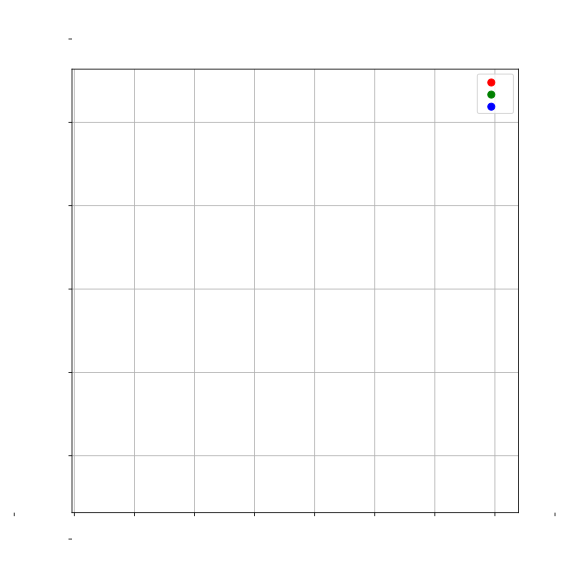

In [106]:
plt.savefig('/tmp/plot.svg')